## Business Problem
The dataset is from the U.S. Small Business Administration (SBA)
The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.
There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

### Task
- 1 Indentify whiche explanatory variables may be good "predictors" or risk indicators of the level of risk associated with loans

- 2 Build models to classify a loan based on predicted risk of default.

- 3 Make a scenario-based decision informed by data analyses (whether to fund the loan)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
pathnames = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pathnames.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/should-this-loan-be-approved-or-denied/SBAnational.csv
/kaggle/input/should-this-loan-be-approved-or-denied/Should This Loan be Approved or Denied A Large Dataset with Class Assignment Guidelines.pdf


In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression # For Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier # For Desicion Tree Classification Model
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classification Model
from sklearn.model_selection import GridSearchCV # For hyperparameters tuning
from sklearn.preprocessing import LabelEncoder # For converted categorical variables to numerical variables
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
import plotly.express as px

## 1 Data Wrangling
### 1.1 Data Validation And Cleaning:
There are 899,164 records with 27 columns.
- **LoanNr_ChkDgt**: Idenitfier of the loan, primary key (min1000014003 -> max9996003010  total 886240 records)
- **Name**: Borrower name after dropna. 899,164-> 886240 Unique_name 769,838
- **City**: Borrower city (32298 cities, Top 3: LOS ANGELES 11467, HOUSTON 10129,NEW YORK 7758
- **State**: Borrower state (50 states and DC)
- **Zip**: Borrower zip code (33501)
- **Bank**: Bank (Lender) name (5788)
- **BanksState**: Bank state (56: 50 states + DC + PR(Puerto Rico) + GU(Guam) + VI(U.S. Virgin Islands) + AN + EN
- **NAICS**: North American industry classification system code Top 5: 0:summary,not specific, 722110: "Full-Service Restaurants" industry 722211: "Limited-Service Restaurants" industry,811111:General Automotive Repair,621210:Offices of Dentists 
- **ApprovalDate**: Date SBA committment isssued (top3: 7-Jul-93 1120, 30-Jan-04, 1028, 8-Jul-93 775)
- **ApprovalFY**: Fiscal year of commitment (corrected the year" 1976A" as "1976")
- **Term**: Loan term in months (min 0 to max 569, top 3: 84,60,240) 
- **NoEmp**: Number of business employees (min0 to max 9999. top 5: 1,2,3,4,5)
- **NewExist**: 1= exisitng business, 2 = new business (1.0: 636,139, 2.0: 249,080, 0.0: 1021)
- **CreatJob**: Number of job created (min 0 to max 9500, top5: 0,1,2,3,4)
- **RetainedJob**: Number of job retained (mn 0 to max 9500, top 5: 0,1,2,3,4)
- **FranchiseCode**: Franchise Code (00000 or 00001) = No franchise ( 1: 631412, 0: 203625, other:..)
- **UrbanRural**: 1= Urban, 2 = Rural, 0= undefined ( 1: 465,149, 0: 317,016, 2: 104075)
- **RevLineCr**: Revovling line of credit (after cleaning: 0: 672802, 1: 213,373)
- **LowDoc**: LowDoc Loan Program (after cleaning: 0: 776,376, 1:108,708)
- **ChgOffDate**: the date when a loan is declared to be in default (81.90% missing value, drop/ impute)
- **DisbursementDate**: disbursement date(top 3: 31-Jul-95, 31-Jan- 95, 31-Oct-94)
- **DisbursementGross**: Amount disbursed (top3: 50,000, 100,000, 25,000)
- **BalanceGross**: Gross amount outstanding (0: 885070, other)
- **MIS_Status**: Loan status charged off = CHGOFF, Paid in full = PIF **"target variable"** (convert to 0:1. 0:729,475, 1:155,609) 
- **GrAppv**: Gross amount of loan aprroved by bank (top3: 50,000, 25,000, 100,000)
- **SBA_Appr**: SBA's Guaranteed amount of approved loan (top 3: 25,000, 12,500, 5000)


After data validation and clearning, there are 885084 records with 26 columns.

In [3]:
loan =pd.read_csv(pathnames[0])

In [4]:
print(loan.head())
print(loan.shape)
print(loan.info())
print(loan.describe())


   LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  Disbu

In [5]:
loan.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [6]:
total = loan.isnull().sum().sort_values(ascending = False)
percent = (loan.isnull().sum()/loan.isnull().count()*100).sort_values(ascending = False)
loan_missing_value  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(loan_missing_value)

                    Total    Percent
ChgOffDate         736465  81.905526
RevLineCr            4528   0.503579
LowDoc               2582   0.287156
DisbursementDate     2368   0.263356
MIS_Status           1997   0.222095
BankState            1566   0.174162
Bank                 1559   0.173383
NewExist              136   0.015125
City                   30   0.003336
State                  14   0.001557
Name                   14   0.001557
LoanNr_ChkDgt           0   0.000000
GrAppv                  0   0.000000
ChgOffPrinGr            0   0.000000
BalanceGross            0   0.000000
DisbursementGross       0   0.000000
CreateJob               0   0.000000
UrbanRural              0   0.000000
FranchiseCode           0   0.000000
RetainedJob             0   0.000000
NoEmp                   0   0.000000
Term                    0   0.000000
ApprovalFY              0   0.000000
ApprovalDate            0   0.000000
NAICS                   0   0.000000
Zip                     0   0.000000
S

In [7]:
# drop the column of "ChgOffDate" and dropna() for all row

loan = loan.drop(columns = 'ChgOffDate')
loan = loan.dropna()
print(loan.shape)
print(loan.isnull().sum())


## 899164 records -- > 886,240 records

(886240, 26)
LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64


In [8]:
loan.LoanNr_ChkDgt.value_counts().sort_values()

LoanNr_ChkDgt
1000014003    1
1000705005    1
1000474001    1
1000034009    1
1000044001    1
             ..
9995493004    1
9995563001    1
9995573004    1
9995353008    1
9996003010    1
Name: count, Length: 886240, dtype: int64

In [9]:
loan.Name.nunique()

769838

In [10]:
loan.City.value_counts()

City
LOS ANGELES                       11467
HOUSTON                           10129
NEW YORK                           7758
CHICAGO                            5936
MIAMI                              5540
                                  ...  
VERGUS                                1
LACROSSE,                             1
CHESTNUT RIDGE(TOWN OF RAMAPO)        1
Elkridge (elk ridge)                  1
SO. OZONE PARK                        1
Name: count, Length: 32298, dtype: int64

In [11]:
print(loan.State.nunique())
loan.State.value_counts()

51


State
CA    129398
TX     69348
NY     56869
FL     40673
PA     34398
OH     32200
IL     29149
MA     24737
MN     24129
NJ     23817
WA     22971
GA     21998
WI     20758
MO     20406
CO     20342
MI     20281
UT     18610
AZ     17431
NC     14064
IN     13883
MD     13063
VA     12929
CT     12001
NH     11871
IA     11767
KS     11308
OR     10934
OK      9798
LA      9421
ID      9251
TN      9237
RI      8852
MT      8604
AL      8248
NV      7925
KY      7618
MS      7556
NE      6287
AR      6233
NM      5935
ME      5858
SC      5504
VT      5363
ND      5185
SD      4349
HI      3546
WV      3226
WY      2789
AK      2360
DE      2161
DC      1599
Name: count, dtype: int64

In [12]:
loan.Zip.value_counts()

Zip
10001    919
90015    917
93401    749
90010    731
33166    668
        ... 
71858      1
71962      1
84516      1
10409      1
26134      1
Name: count, Length: 33501, dtype: int64

In [13]:
loan.Bank.value_counts()

Bank
BANK OF AMERICA NATL ASSOC        86075
WELLS FARGO BANK NATL ASSOC       62934
JPMORGAN CHASE BANK NATL ASSOC    47460
U.S. BANK NATIONAL ASSOCIATION    34752
CITIZENS BANK NATL ASSOC          33569
                                  ...  
AMER BK & TR WISCONSIN                1
BANK OF IDAHO HOLDING COMPANY         1
APPLE CREEK BK. CO                    1
HERITAGE BK E. BAY A DIVISION         1
DEPCO                                 1
Name: count, Length: 5788, dtype: int64

In [14]:
print(loan.BankState.nunique())
loan.BankState.value_counts()

56


BankState
CA    116737
NC     78708
IL     64919
OH     57931
SD     50626
TX     47252
RI     43869
NY     39209
VA     28794
DE     24374
MN     19761
UT     18837
PA     16886
WI     15246
MO     14677
FL     13655
GA     13625
MA     13620
AL     11979
OR     11166
WA     10563
CO     10450
CT      9808
IA      9729
NJ      9348
KS      8751
MT      7732
IN      7512
SC      7423
MI      7274
OK      7226
MD      6928
NH      6694
AR      6221
MS      5840
TN      5551
NE      5259
ND      5049
LA      5006
VT      4688
NM      4342
NV      4304
KY      4303
ID      4254
DC      3957
AZ      3908
ME      3634
HI      2941
WY      2132
WV      1976
AK      1404
PR       154
GU         5
AN         1
EN         1
VI         1
Name: count, dtype: int64

- PR - This represents Puerto Rico.
- GU - This represents Guam.
- AN - This is not a recognized U.S. state or territory abbreviation. 
- EN - Similar to "AN," this is not a recognized U.S. state or territory abbreviation. 
- VI - This represents the U.S. Virgin Islands.
- DC - This represents the District of Columbia, which is not a state but a federal district.

Text(0.5, 1.0, 'Distribution of Counts by NAICS')

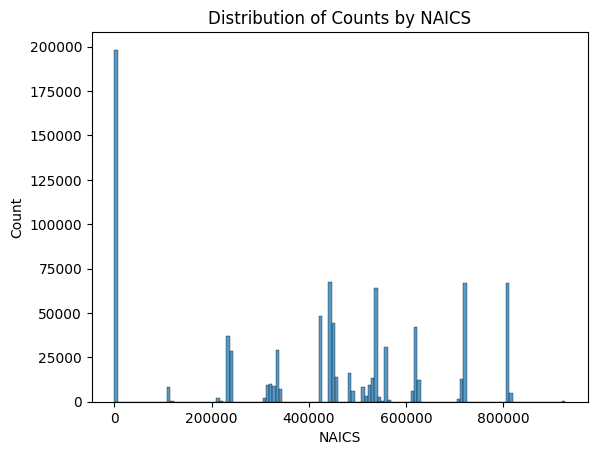

In [15]:
# distribution of NAICS
sns.histplot(loan.NAICS)
plt.title('Distribution of Counts by NAICS')
# loan.NAICS.value_counts()

In [16]:
loan.NAICS.value_counts().sort_values(ascending = False)

NAICS
0         198267
722110     27772
722211     19338
811111     14392
621210     13856
           ...  
311311         1
221114         1
325180         1
333413         1
514190         1
Name: count, Length: 1311, dtype: int64

In [17]:
loan.ApprovalDate.value_counts()

ApprovalDate
7-Jul-93     1120
30-Jan-04    1028
8-Jul-93      775
4-Oct-04      658
30-Sep-03     606
             ... 
30-Jan-75       1
26-Sep-74       1
12-Jun-14       1
31-Jan-09       1
11-May-85       1
Name: count, Length: 9786, dtype: int64

<Axes: xlabel='ApprovalDate', ylabel='Count'>

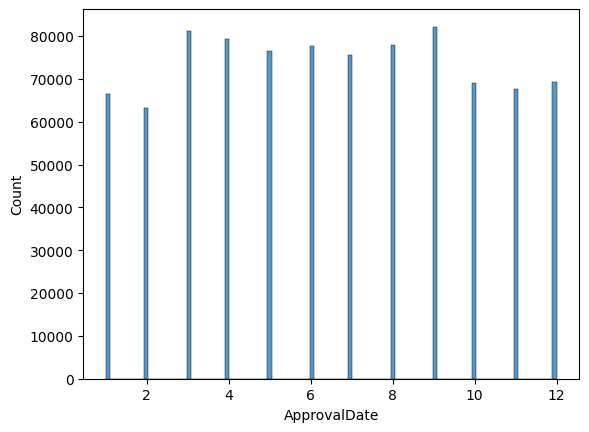

In [18]:
# group by month
import datetime
loan['ApprovalDate'] = pd.to_datetime(loan['ApprovalDate'], format='%d-%b-%y')
sns.histplot(data=loan, x=loan['ApprovalDate'].dt.month)



In [19]:
loan.ApprovalFY.value_counts()
loan.loc[loan['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

<Axes: xlabel='ApprovalFY', ylabel='Count'>

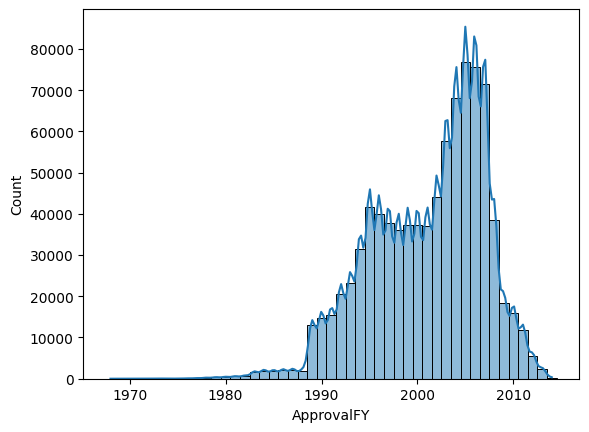

In [20]:
sns.histplot(loan.ApprovalFY, bins=10, kde=True)

In [21]:
print(loan.Term.value_counts().sort_values(ascending = False))
print(max(loan.Term))
print(min(loan.Term))


Term
84     225820
60      88507
240     84964
120     76712
300     44395
        ...  
443         1
511         1
445         1
409         1
429         1
Name: count, Length: 411, dtype: int64
569
0


<Axes: xlabel='Term', ylabel='Count'>

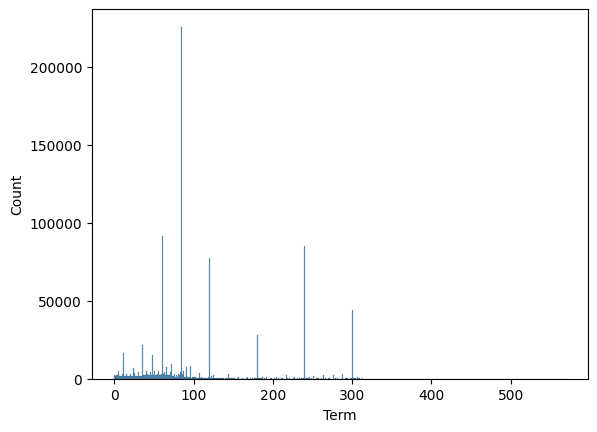

In [22]:
sns.histplot(loan.Term)

In [23]:
print(loan.NoEmp.value_counts().sort_values(ascending = False))
print(max(loan.NoEmp))
print(min(loan.NoEmp))

NoEmp
1       151454
2       136321
3        89355
4        72649
5        59520
         ...  
1440         1
410          1
488          1
4501         1
3713         1
Name: count, Length: 597, dtype: int64
9999
0


In [24]:
loan.NewExist.value_counts()

NewExist
1.0    636139
2.0    249080
0.0      1021
Name: count, dtype: int64

In [25]:
print(loan.CreateJob.value_counts())
print(max(loan.CreateJob))
print(min(loan.CreateJob))

CreateJob
0       619802
1        62272
2        57049
3        28461
4        20249
         ...  
171          1
146          1
5199         1
214          1
860          1
Name: count, Length: 246, dtype: int64
8800
0


In [26]:
print(loan.RetainedJob.value_counts())
print(max(loan.RetainedJob))
print(min(loan.RetainedJob))

RetainedJob
0      433397
1       87244
2       75850
3       49294
4       39168
        ...  
182         1
191         1
247         1
226         1
198         1
Name: count, Length: 356, dtype: int64
9500
0


In [27]:
loan.FranchiseCode.value_counts()

FranchiseCode
1        631412
0        203625
78760      3342
68020      1917
50564      1023
          ...  
83876         1
12545         1
68170         1
69145         1
15930         1
Name: count, Length: 2754, dtype: int64

In [28]:
loan['FranchiseCode'] = loan['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)
# 0, 1 : for not having Franchise
# other: for having Franchise


In [29]:
loan.FranchiseCode.value_counts()

FranchiseCode
0    835037
1     51203
Name: count, dtype: int64

In [30]:
loan.UrbanRural.value_counts()

UrbanRural
1    465149
0    317016
2    104075
Name: count, dtype: int64

In [31]:
loan.RevLineCr.value_counts()

RevLineCr
N    415439
0    257363
Y    198267
T     15106
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

In [32]:
# Map 'N' to 0, 'Y' and 'T' to 1 in the 'RevLineCr' column
loan.loc[(loan['RevLineCr'] == 'N') | (loan['RevLineCr'] == '0'), 'RevLineCr'] = 0
loan.loc[(loan['RevLineCr'] == 'Y') | (loan['RevLineCr'] == 'T'), 'RevLineCr'] = 1

# Filter the DataFrame to include only rows where 'RevLineCr' is 0 or 1
loan = loan[(loan['RevLineCr'] == 0) | (loan['RevLineCr'] == 1)]


In [33]:
# Double check:
loan.RevLineCr.value_counts()

RevLineCr
0    672802
1    213373
Name: count, dtype: int64

In [34]:
loan.LowDoc.value_counts()

LowDoc
N    775140
Y    107878
0      1236
C       756
S       598
A       492
R        74
1         1
Name: count, dtype: int64

In [35]:
# Map 'N','0' to 0, 'Y' and 'T' to 1 in the 'LowDoc' column
loan.loc[(loan['LowDoc'] == 'N') | (loan['LowDoc'] == '0'),'LowDoc'] = 0
loan.loc[(loan['LowDoc'] == 'Y') | (loan['LowDoc'] == 'C' )|(loan['LowDoc'] == 'R'), 'LowDoc'] = 1

# Filter the DataFrame to include only rows where 'RevLineCr' is 0 or 1
loan = loan[(loan['LowDoc'] == 0) | (loan['LowDoc'] == 1)]

In [36]:
# Double check:
loan.LowDoc.value_counts()

LowDoc
0    776376
1    108708
Name: count, dtype: int64

In [37]:
loan.shape

(885084, 26)

In [38]:
loan.DisbursementDate.value_counts()

DisbursementDate
31-Jul-95    9745
31-Jan-95    9691
31-Oct-94    8855
30-Apr-96    8028
31-Oct-95    8000
             ... 
23-Sep-81       1
10-Oct-03       1
4-Mar-83        1
27-Mar-99       1
25-Oct-97       1
Name: count, Length: 8434, dtype: int64

In [39]:
print(loan.DisbursementGross.value_counts())

DisbursementGross
$50,000.00        42835
$100,000.00       35968
$25,000.00        26777
$150,000.00       23060
$10,000.00        20813
                  ...  
$101,118.00           1
$621,189.00           1
$113,978.00           1
$44,147.00            1
$1,086,300.00         1
Name: count, Length: 117730, dtype: int64


In [40]:
loan.BalanceGross.value_counts()

BalanceGross
$0.00           885070
$12,750.00           1
$827,875.00          1
$25,000.00           1
$37,100.00           1
$43,127.00           1
$84,617.00           1
$1,760.00            1
$115,820.00          1
$996,262.00          1
$395,476.00          1
$41,509.00           1
$600.00              1
$9,111.00            1
$96,908.00           1
Name: count, dtype: int64

In [41]:
loan.MIS_Status.value_counts()

MIS_Status
P I F     729475
CHGOFF    155609
Name: count, dtype: int64

In [42]:
# convert PIF to 0, GHROFF/Default to 1
loan.loc[loan['MIS_Status'] == 'P I F', 'MIS_Status'] = 0
loan.loc[loan['MIS_Status'] == 'CHGOFF', 'MIS_Status'] = 1

In [43]:
# double check:
loan.MIS_Status.value_counts()

MIS_Status
0    729475
1    155609
Name: count, dtype: int64

In [44]:
loan.ChgOffPrinGr.value_counts()

ChgOffPrinGr
$0.00           725319
$50,000.00        2101
$10,000.00        1856
$25,000.00        1361
$35,000.00        1339
                 ...  
$314,045.00          1
$245,028.00          1
$20,204.00           1
$91,831.00           1
$124,847.00          1
Name: count, Length: 82509, dtype: int64

In [45]:
loan.GrAppv.value_counts()

GrAppv
$50,000.00        68327
$25,000.00        50499
$100,000.00       50136
$10,000.00        37726
$150,000.00       27273
                  ...  
$195,444.00           1
$348,454.00           1
$104,709.00           1
$12,131.00            1
$1,086,300.00         1
Name: count, Length: 21917, dtype: int64

In [46]:
loan.SBA_Appv.value_counts()

SBA_Appv
$25,000.00      49273
$12,500.00      39813
$5,000.00       30840
$50,000.00      24898
$10,000.00      16902
                ...  
$50,036.00          1
$135,686.00         1
$24,329.00          1
$82,260.00          1
$715,674.00         1
Name: count, Length: 37927, dtype: int64

In [47]:
loan.shape

(885084, 26)

In [48]:
loan.MIS_Status = loan.MIS_Status.astype(int)
loan.RevLineCr = loan.RevLineCr.astype(int)
loan.LowDoc = loan.LowDoc.astype(int)
loan.RevLineCr = loan.RevLineCr.astype(int)
loan.ApprovalFY= loan.ApprovalFY.astype(int)

In [49]:
# DisbursementGross
# Remove the '$' ,","symbol from the 'Amount' column and convert to float
loan.DisbursementGross = loan.DisbursementGross.str.replace("$","")
loan.DisbursementGross = loan.DisbursementGross.str.replace(",","").astype(float)


In [50]:
#  BalanceGross
# Remove the '$' ,","symbol from the 'Amount' column and convert to float
loan.BalanceGross = loan.BalanceGross.str.replace("$","")
loan.BalanceGross = loan.BalanceGross.str.replace(",","").astype(float)

In [51]:
#  ChgOffPrinGr
# Remove the '$' ,","symbol from the 'Amount' column and convert to float
loan.ChgOffPrinGr = loan.ChgOffPrinGr.str.replace("$","")
loan.ChgOffPrinGr = loan.ChgOffPrinGr.str.replace(",","").astype(float)

In [52]:
#  GrAppv
# Remove the '$' ,","symbol from the 'Amount' column and convert to float
loan.GrAppv = loan.GrAppv.str.replace("$","")
loan.GrAppv = loan.GrAppv.str.replace(",","").astype(float)

In [53]:
#  SBA_Appv
# Remove the '$' ,","symbol from the 'Amount' column and convert to float
loan.SBA_Appv = loan.SBA_Appv.str.replace("$","")
loan.SBA_Appv = loan.SBA_Appv.str.replace(",","").astype(float)

In [54]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885084 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      885084 non-null  int64         
 1   Name               885084 non-null  object        
 2   City               885084 non-null  object        
 3   State              885084 non-null  object        
 4   Zip                885084 non-null  int64         
 5   Bank               885084 non-null  object        
 6   BankState          885084 non-null  object        
 7   NAICS              885084 non-null  int64         
 8   ApprovalDate       885084 non-null  datetime64[ns]
 9   ApprovalFY         885084 non-null  int64         
 10  Term               885084 non-null  int64         
 11  NoEmp              885084 non-null  int64         
 12  NewExist           885084 non-null  float64       
 13  CreateJob          885084 non-null  int64        

### 1.2 Exploratory Data Analysis (EDA)

#### Target Variable: MIS_Status

0.1758126912247877

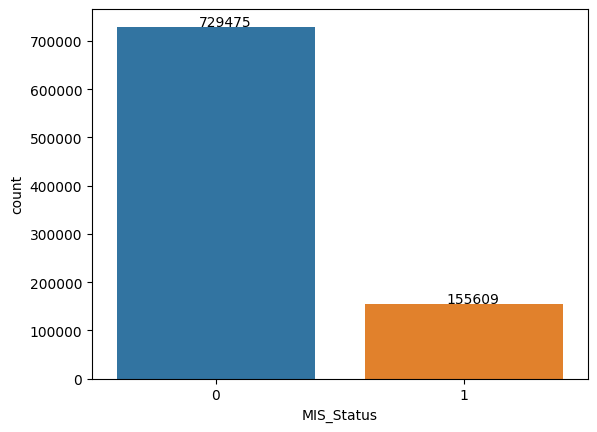

In [55]:
# Target Variable - MIS_Status
ax = sns.countplot(x = 'MIS_Status', data = loan)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+2000))

loan.MIS_Status.mean()
# The default rate is 17.58%.


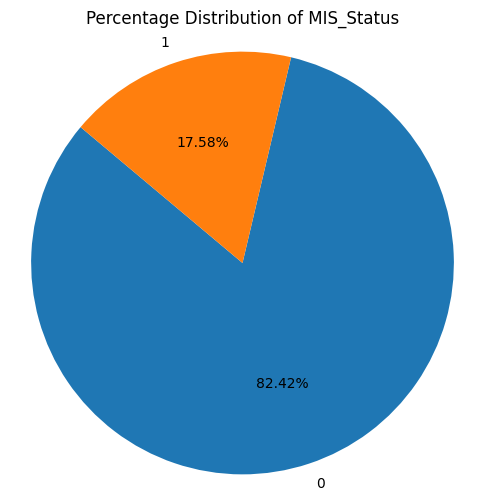

In [56]:
# Calculate the percentage distribution of MIS_Status
status_counts = loan['MIS_Status'].value_counts()
total_loans = len(loan)
percent_distribution = (status_counts / total_loans) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percent_distribution, labels=percent_distribution.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentage Distribution of MIS_Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [57]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 47.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
Note: you may need to restart the kernel to use updated packages.


In [59]:
default_rate_df = loan.groupby('State')['MIS_Status'].mean().reset_index()

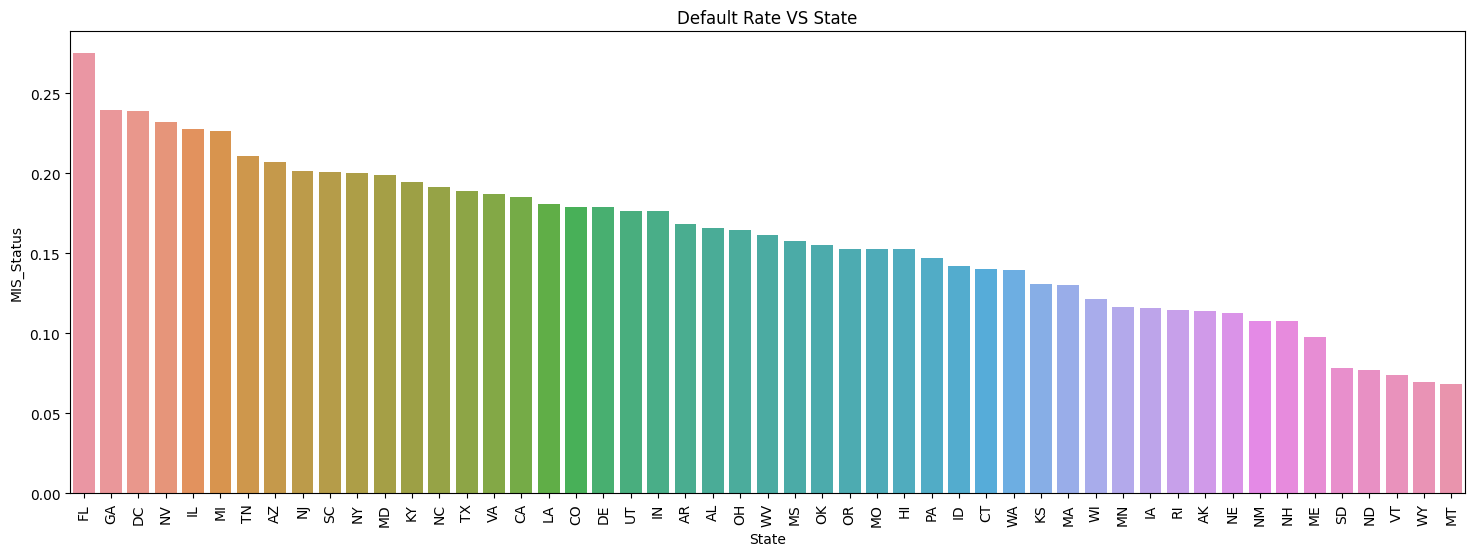

In [60]:
# State vs Target variable

# Create a list to specify the order for sorting
order = loan.groupby('State')['MIS_Status'].mean().sort_values(ascending=False).index

# Set the figure size
plt.figure(figsize=(18, 6))

# Create the barplot with the specified order
sns.barplot(x='State', y='MIS_Status', data=loan, order=order,ci=None)

plt.title("Default Rate VS State")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

# Top 3: FL,GA,DC


In [61]:
# import plotly.express as px

# # Assuming you have the 'default_rate_df' DataFrame with 'State' and 'MIS_Status' columns
# fig = px.choropleth(
#     default_rate_df,
#     locations='State',  # Specify the column with state codes or names
#     locationmode='USA-states',  # Use USA-states for U.S. state-level data
#     color='MIS_Status',  # Specify the data to be visualized by color
#     color_continuous_scale='Viridis',  # You can choose a different color scale
#     scope='usa',  # Set the scope to 'usa' for U.S. map
#     title='Default Rates by State'
# )

# # Customize the appearance of the map (optional)
# fig.update_geos(
#     visible=False,  # Hide the background map
#     showcoastlines=True,  # Show coastlines
#     coastlinecolor="Black",  # Customize coastline color
#     showland=True,  # Show land
#     landcolor="white",  # Customize land color
# )

# # Show the map
# fig.show()

### NAICS CODES

 The first two digits of the NAICS classification represent an economic sector.
- 11 Agriculture, forestry, fishing and hunting

- 21 Mining, quarrying, and oil and gas extraction

- 22 Utilities

- 23 Construction

- 31–33 Manufacturing

- 42 Wholesale trade

- 44–45 Retail trade

- 48–49 Transportation and warehousing

- 51 Information

- 52 Finance and insurance

- 53 Real estate and rental and leasing

- 54 Professional, scientific, and technical services

- 55 Management of companies and enterprises

- 56 Administrative and support and waste management and remediation services

- 61 Educational services

- 62 Health care and social assistance

- 71 Arts, entertainment, and recreation

- 72 Accommodation and food services

- 81 Other services (except public administration)

- 92 Public administration

In [62]:
#Get the first two digits of the NAICS feature in order to group loans to same economic sector
def get_naics(x):
    x = int(str(x)[:2])
    if 31 <= x <= 33:
        return str(31)
    elif 44 <= x <= 45:
        return str(44)
    elif 48 <= x <= 49:
        return str(48)
    else:
        return str(x)
    
loan['Econ_Sector'] = loan['NAICS'].apply(get_naics)

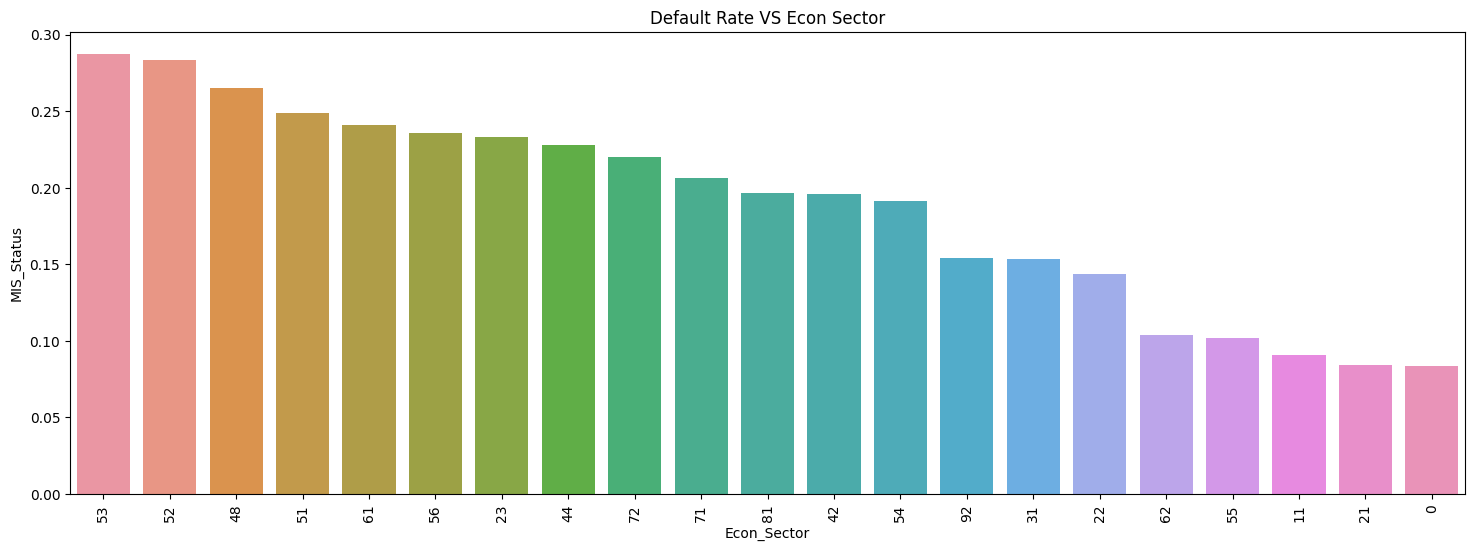

In [63]:
# Create a list to specify the order for sorting
order = loan.groupby('Econ_Sector')['MIS_Status'].mean().sort_values(ascending=False).index

# Set the figure size
plt.figure(figsize=(18, 6))

# Create the barplot with the specified order
sns.barplot(x='Econ_Sector', y='MIS_Status', data=loan, order=order, ci=None)

plt.title("Default Rate VS Econ Sector")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

# 53: Real estate and rental and leasing
# 52:  Finance and insurance
# 48: Transportation and warehousing

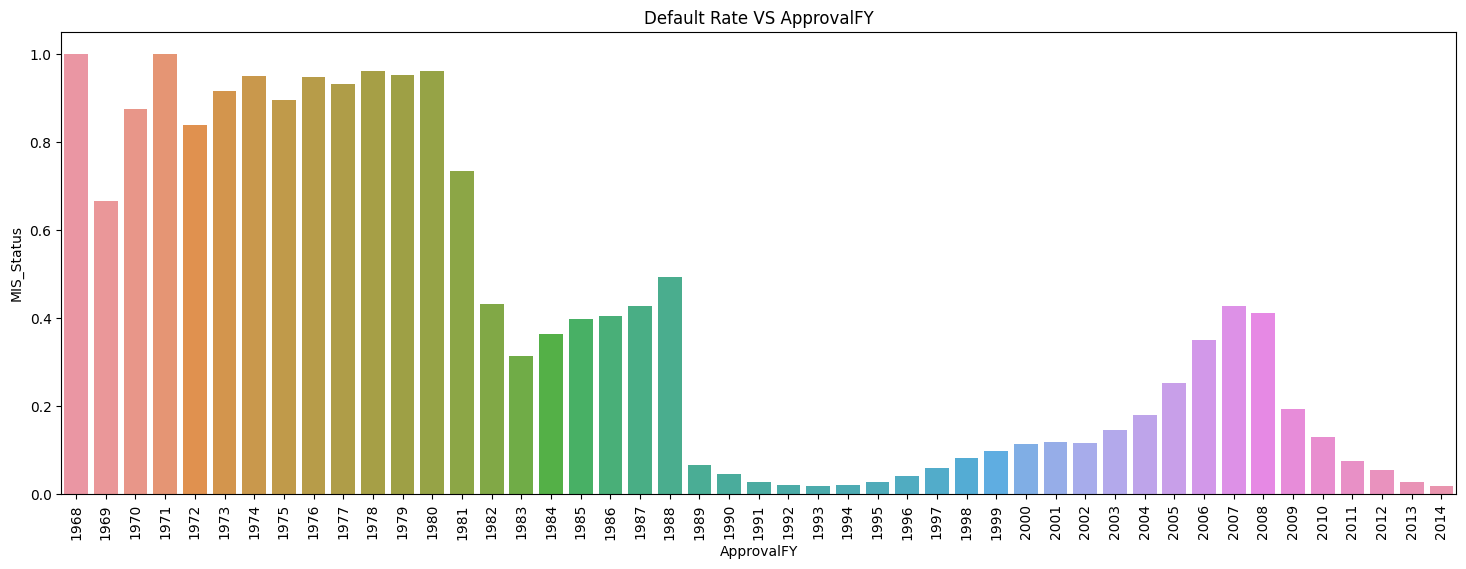

In [64]:
# Set the figure size
plt.figure(figsize=(18, 6))

# Create the barplot
sns.barplot(x='ApprovalFY', y='MIS_Status', data=loan,ci=None)

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.title("Default Rate VS ApprovalFY")
plt.xlabel("ApprovalFY")  # Set the x-axis label

plt.show()

# can't be a predictor.

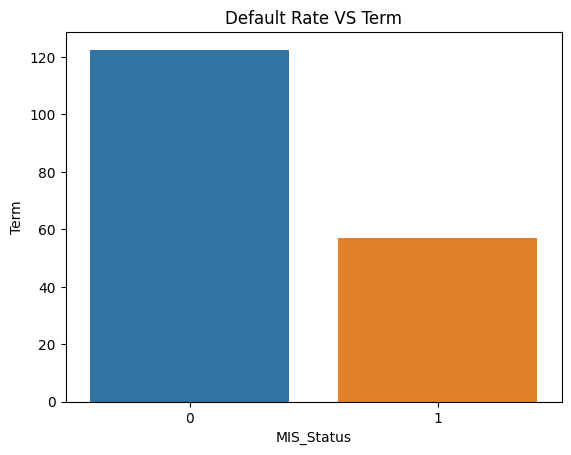

In [65]:

# Create the barplot
sns.barplot(x='MIS_Status', y='Term', data=loan,ci=None)
plt.title("Default Rate VS Term")
plt.show()

# Default loan on averge has a shorter term 

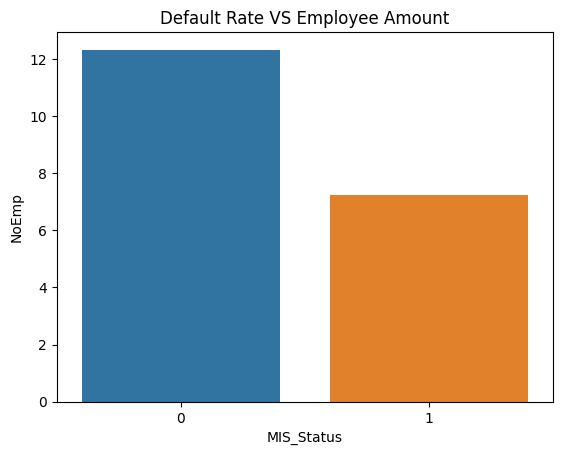

In [66]:
# Create the barplot
sns.barplot(x='MIS_Status', y='NoEmp', data=loan,ci=None)
plt.title("Default Rate VS Employee Amount")
plt.show()

# Default loan on average has a smaller amount of employees. 

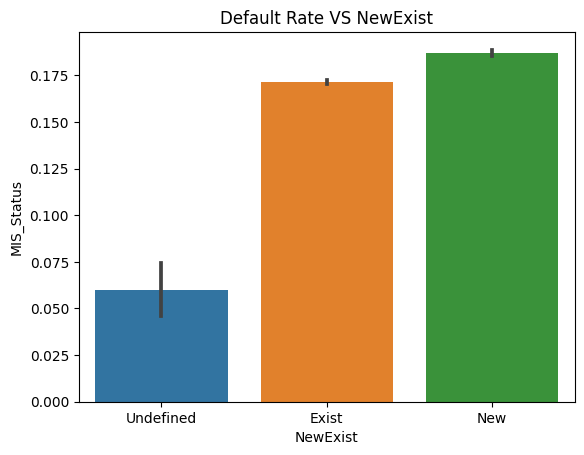

In [67]:
#  Default Rate VS NewExist

# Create the barplot without custom x-axis labels
sns.barplot(x='NewExist', y='MIS_Status', data=loan)

# Define custom tick labels
custom_labels = ["Undefined", "Exist", "New"]

# Set custom tick labels for the x-axis
plt.gca().set_xticklabels(custom_labels)

plt.title("Default Rate VS NewExist")
plt.xlabel("NewExist")  # Set the x-axis label

plt.show()

# custom_labels = {
#     0: "Undefined",
#     1: "Exist",
#     2: "New"
# }

## new business has higher default rate.

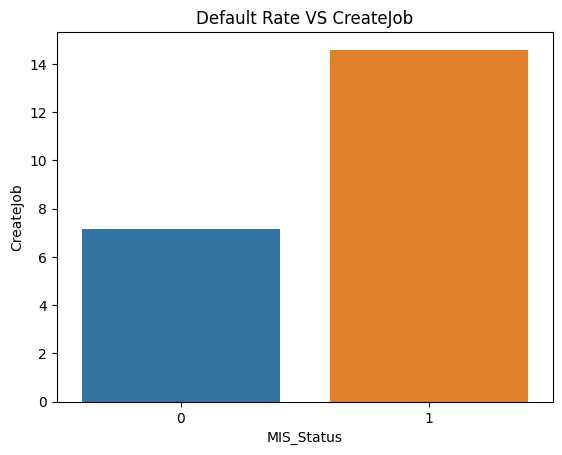

In [68]:
# Create the barplot
sns.barplot(x='MIS_Status', y='CreateJob', data=loan,ci=None)
plt.title("Default Rate VS CreateJob")
plt.show()

# Default loan on average creating more jobs.  #!!!

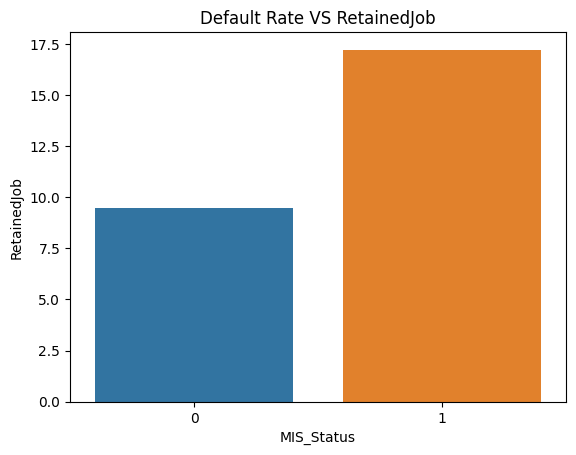

In [69]:
# Create the barplot
sns.barplot(x='MIS_Status', y='RetainedJob', data=loan,ci=None)
plt.title("Default Rate VS RetainedJob")
plt.show()

# Default loan on average retaining more jobs.  #!!!

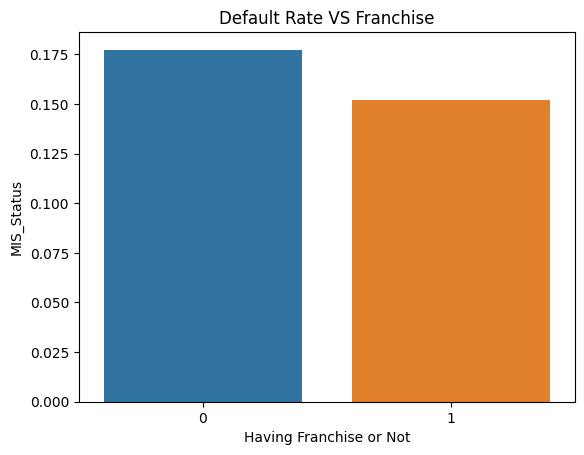

In [70]:
# Create the barplot
sns.barplot(x='FranchiseCode', y='MIS_Status', data=loan,ci=None)
plt.title("Default Rate VS Franchise")
plt.xlabel("Having Franchise or Not")
plt.show()

# Having franchise has lower default rate .  #!!!

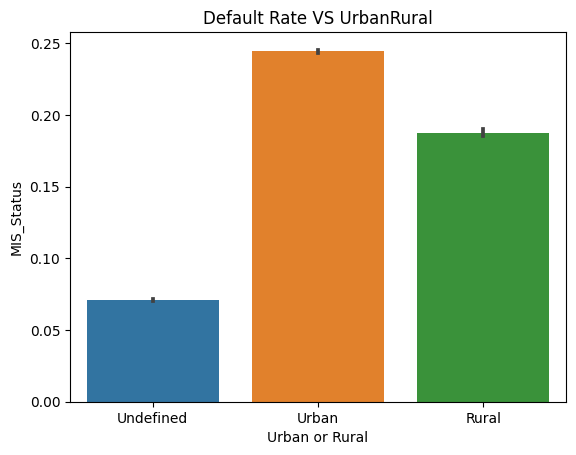

In [71]:
# Create the barplot without custom x-axis labels
sns.barplot(x='UrbanRural', y='MIS_Status', data=loan)

# Define custom tick labels
custom_labels = ["Undefined", "Urban", "Rural"]

# Set custom tick labels for the x-axis
plt.gca().set_xticklabels(custom_labels)

plt.title("Default Rate VS UrbanRural")
plt.xlabel("Urban or Rural")  # Set the x-axis label

plt.show()

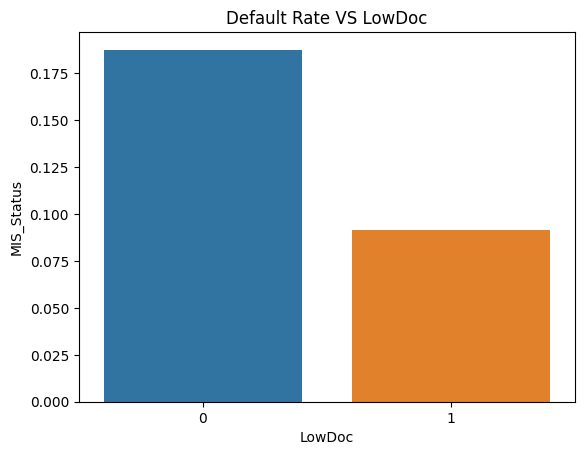

In [72]:
# Create the barplot
sns.barplot(y='MIS_Status',x ='LowDoc', data=loan,ci=None)
plt.title("Default Rate VS LowDoc")
plt.show()

# Low Doc plan loan has a loer default rate  #!!!

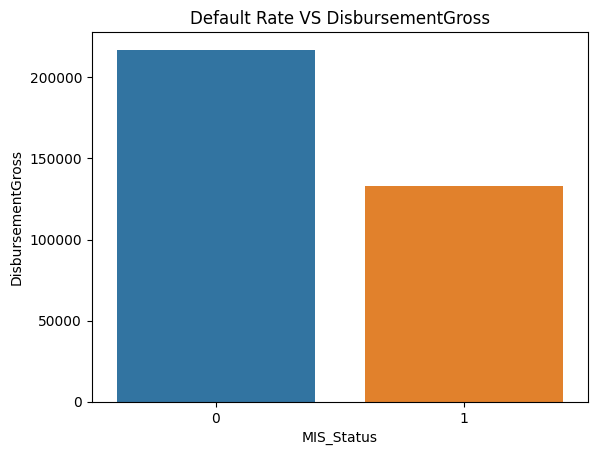

In [73]:
# Create the barplot
sns.barplot(x='MIS_Status', y='DisbursementGross', data=loan,ci=None)
plt.title("Default Rate VS DisbursementGross")
plt.show()

# Default loan has a lower disbursement amount #!!!

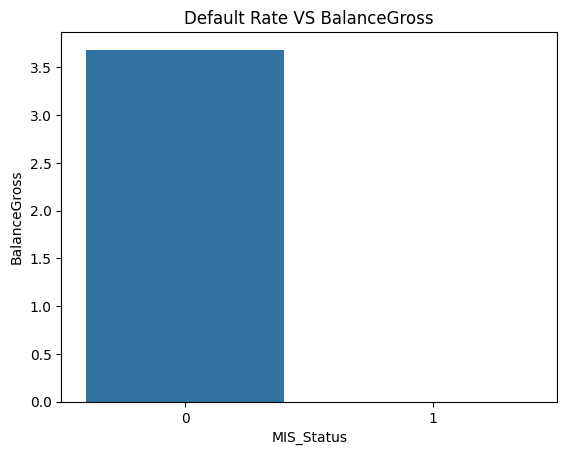

In [74]:
# Create the barplot
sns.barplot(x='MIS_Status', y='BalanceGross', data=loan,ci=None)
plt.title("Default Rate VS BalanceGross")
plt.show()

# cant use as predictor, default loan has no balance amount

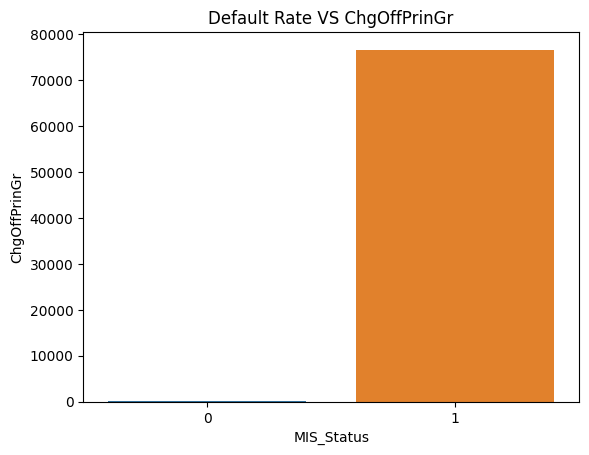

In [75]:
# Create the barplot
sns.barplot(x='MIS_Status', y='ChgOffPrinGr', data=loan,ci=None)
plt.title("Default Rate VS ChgOffPrinGr")
plt.show()

# cant use as predictor, only default loan has charged off amount

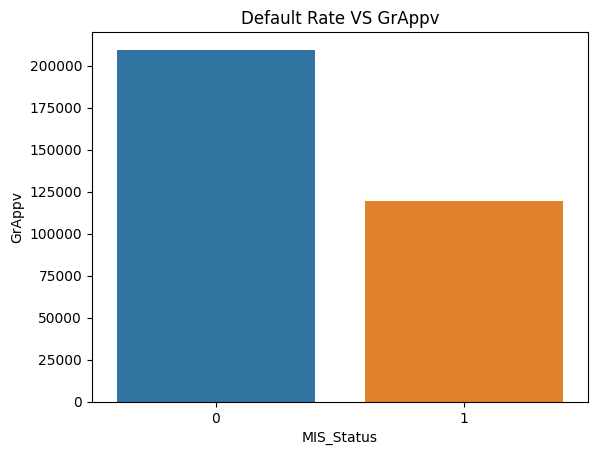

In [76]:
# Create the barplot
sns.barplot(x='MIS_Status', y='GrAppv', data=loan,ci=None)
plt.title("Default Rate VS GrAppv")
plt.show()




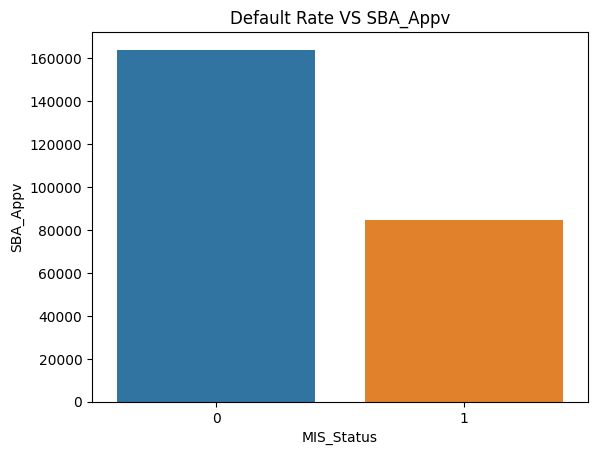

In [77]:
# Create the barplot
sns.barplot(x='MIS_Status', y='SBA_Appv', data=loan,ci=None)
plt.title("Default Rate VS SBA_Appv")
plt.show()


### 1.3 Data Preprocessing

In [78]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885084 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      885084 non-null  int64         
 1   Name               885084 non-null  object        
 2   City               885084 non-null  object        
 3   State              885084 non-null  object        
 4   Zip                885084 non-null  int64         
 5   Bank               885084 non-null  object        
 6   BankState          885084 non-null  object        
 7   NAICS              885084 non-null  int64         
 8   ApprovalDate       885084 non-null  datetime64[ns]
 9   ApprovalFY         885084 non-null  int64         
 10  Term               885084 non-null  int64         
 11  NoEmp              885084 non-null  int64         
 12  NewExist           885084 non-null  float64       
 13  CreateJob          885084 non-null  int64        

In [79]:
loan.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Econ_Sector'],
      dtype='object')

In [80]:
# convert categorical variables to numerical format
labelencoder = LabelEncoder()
loan.State = labelencoder.fit_transform(loan.State)
loan.Econ_Sector = labelencoder.fit_transform(loan.Econ_Sector)

In [81]:
feature_cols = ['State','Econ_Sector','Term','NoEmp','NewExist','CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr','DisbursementGross','GrAppv', 'SBA_Appv']
X = loan[feature_cols]
y = loan['MIS_Status']

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885084 entries, 0 to 899163
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              885084 non-null  int64  
 1   Econ_Sector        885084 non-null  int64  
 2   Term               885084 non-null  int64  
 3   NoEmp              885084 non-null  int64  
 4   NewExist           885084 non-null  float64
 5   CreateJob          885084 non-null  int64  
 6   RetainedJob        885084 non-null  int64  
 7   FranchiseCode      885084 non-null  int64  
 8   UrbanRural         885084 non-null  int64  
 9   RevLineCr          885084 non-null  int64  
 10  DisbursementGross  885084 non-null  float64
 11  GrAppv             885084 non-null  float64
 12  SBA_Appv           885084 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 94.5 MB


In [83]:
y.info()

<class 'pandas.core.series.Series'>
Index: 885084 entries, 0 to 899163
Series name: MIS_Status
Non-Null Count   Dtype
--------------   -----
885084 non-null  int64
dtypes: int64(1)
memory usage: 13.5 MB


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Fitting & Hyperparameters Tuning 
### Decision Tree and 

In [85]:
# Create Decision Tree classifer object
dtm = DecisionTreeClassifier(criterion="entropy", max_depth=8)

# Train Decision Tree Classifer
dtm = dtm.fit(X_train,y_train)

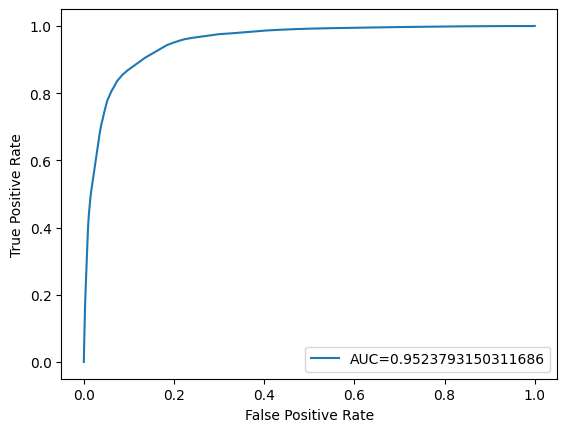

Best Threshold: 0.188 with G-Mean: 0.8852
FPR: 0.0967, TPR: 0.8675


In [86]:
#define metrics
y_pred_proba = dtm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr)) # using G-mean

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

In [87]:
#Predict the response for test dataset
# select the right threshold to make sure the recall of "1" category is higher
threshold = 0.188
y_pred = (dtm.predict_proba(X_test)[:, 1] > threshold).astype('float')

dtm_matrix = metrics.confusion_matrix(y_test, y_pred)
print(dtm_matrix)
dtm_report = metrics.classification_report(y_test,y_pred)
print(dtm_report)

[[197783  21178]
 [  6171  40394]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94    218961
           1       0.66      0.87      0.75     46565

    accuracy                           0.90    265526
   macro avg       0.81      0.89      0.84    265526
weighted avg       0.91      0.90      0.90    265526



In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=dtm_matrix, display_labels=dtm.classes_)
disp.plot()

NameError: name 'ConfusionMatrixDisplay' is not defined

In [ ]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = dtm.feature_importances_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Decision Tree Model')


### 2.2 Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = 42, n_estimators=500, bootstrap = True, max_depth=10,criterion='entropy')
rf.fit(X_train, y_train)

In [ ]:
#define metrics

y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr)) # using G-mean

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

In [ ]:
#Predict the response for test dataset
# select the right threshold to make sure the F1-score is higher
threshold = 0.223
y_pred2 = (rf.predict_proba(X_test)[:, 1] > threshold).astype('float')

rf_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(rf_matrix)
rf_report = metrics.classification_report(y_test,y_pred2,digits=4)
print(rf_report)

In [ ]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = rf.feature_importances_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Random Forest Model')

### References:
- https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied
- https://www.kaggle.com/code/ricardocolindres/loan-default-prediction-loan-parameter-optimizer